In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("train.csv")
df1 = pd.read_csv("meal_info.csv") 
df2 = pd.read_csv("fulfilment_center_info.csv") 

In [3]:
combnd_df = pd.merge(df,df1,on='meal_id')

In [4]:
df = pd.merge(combnd_df,df2,on = 'center_id')

In [5]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A,4.5


In [6]:
print(df.head())


        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
0                      0                  0         177  Beverages    Thai   
1                      0                  0         270  Beverages    Thai   
2                      0                  0         189  Beverages    Thai   
3                      0                  0          54  Beverages  Indian   
4                      0                  0          40  Beverages  Indian   

   city_code  region_code center_type  op_area  
0        647           56      TYPE_C      2.0  
1        647           5

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [8]:
#chekcing for the null values in dataset
print(df.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64


In [9]:
print(df.describe())

                 id           week      center_id        meal_id  \
count  4.565480e+05  456548.000000  456548.000000  456548.000000   
mean   1.250096e+06      74.768771      82.105796    2024.337458   
std    1.443548e+05      41.524956      45.975046     547.420920   
min    1.000000e+06       1.000000      10.000000    1062.000000   
25%    1.124999e+06      39.000000      43.000000    1558.000000   
50%    1.250184e+06      76.000000      76.000000    1993.000000   
75%    1.375140e+06     111.000000     110.000000    2539.000000   
max    1.499999e+06     145.000000     186.000000    2956.000000   

       checkout_price     base_price  emailer_for_promotion  \
count   456548.000000  456548.000000          456548.000000   
mean       332.238933     354.156627               0.081152   
std        152.939723     160.715914               0.273069   
min          2.970000      55.350000               0.000000   
25%        228.950000     243.500000               0.000000   
50%      

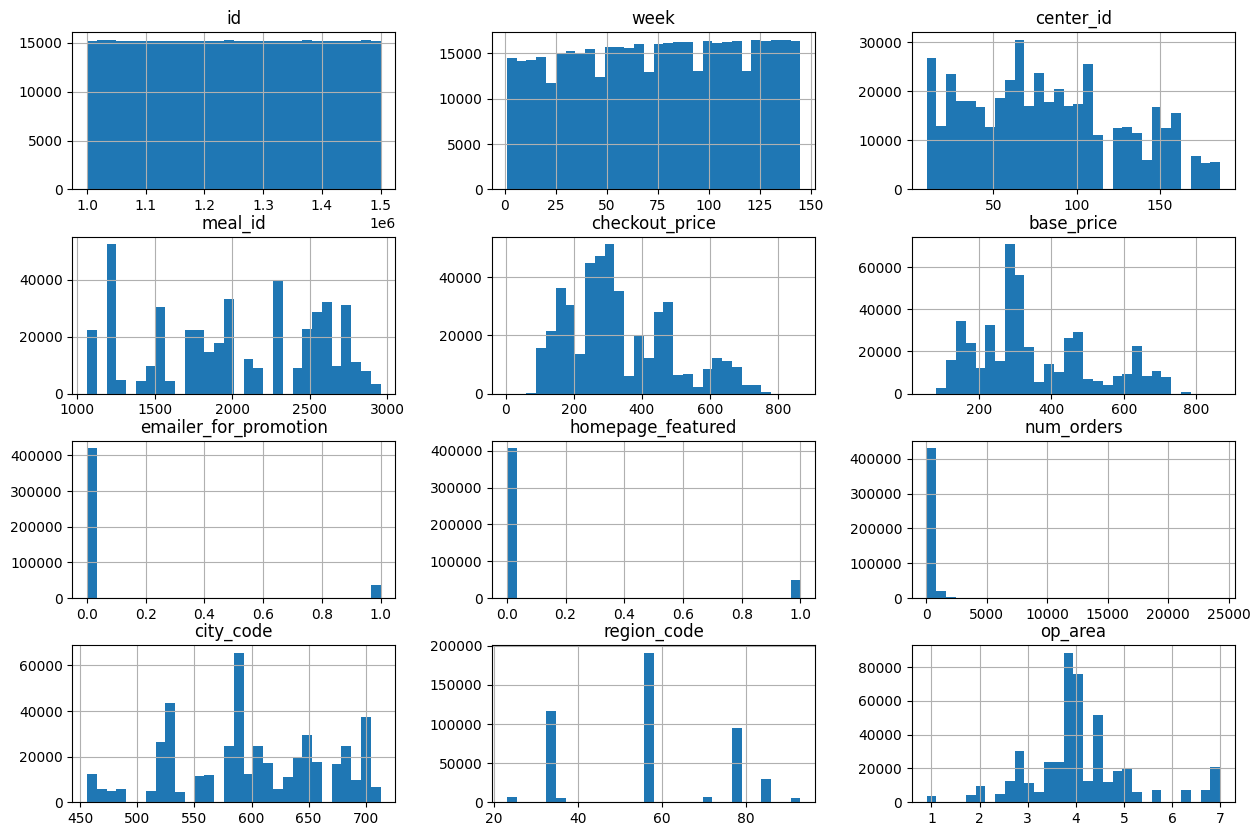

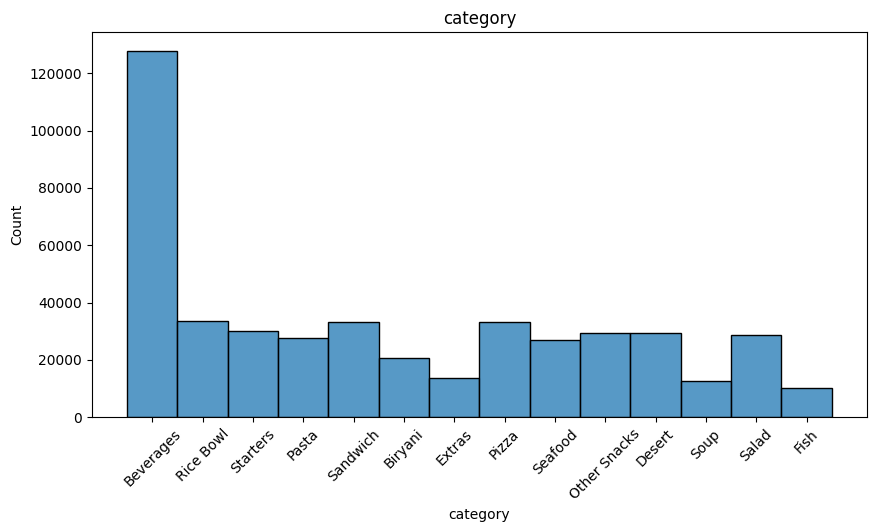

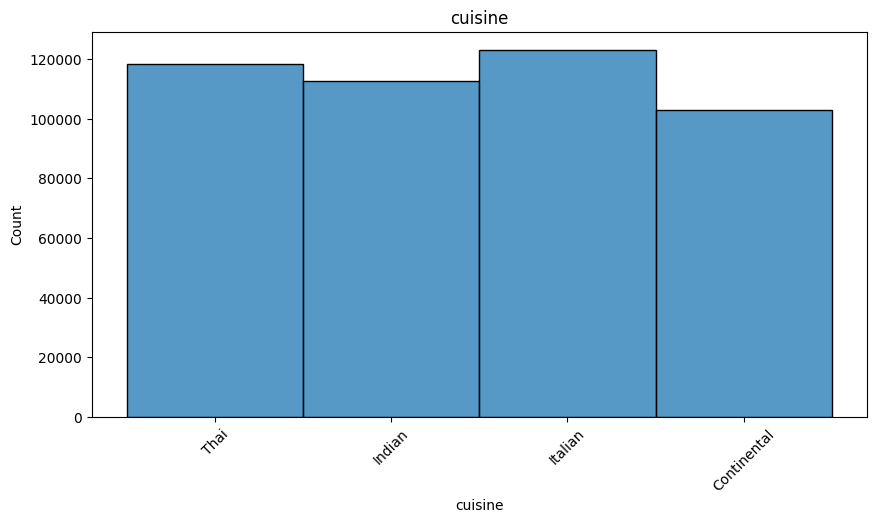

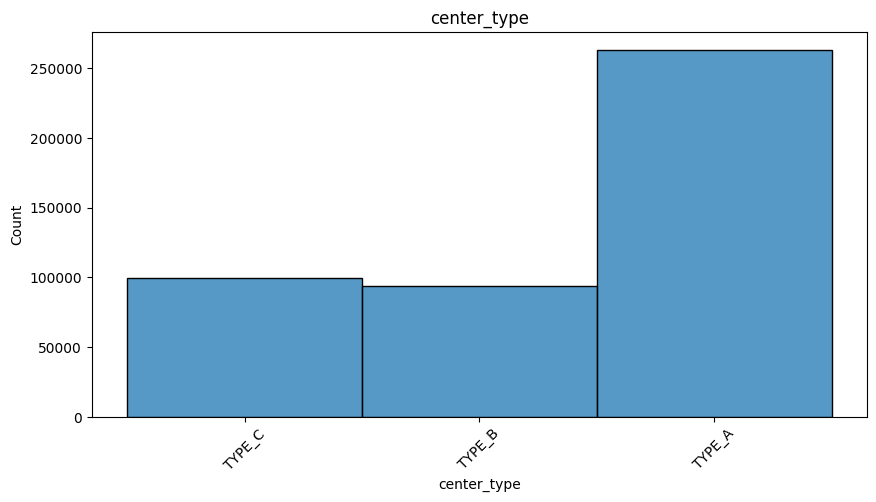

In [10]:
df.hist(bins=30, figsize=(15, 10))
plt.show()
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column])
    plt.title(column)
    plt.xticks(rotation=45)
    plt.show()


In [11]:
numerical_df = df.select_dtypes(include="number")

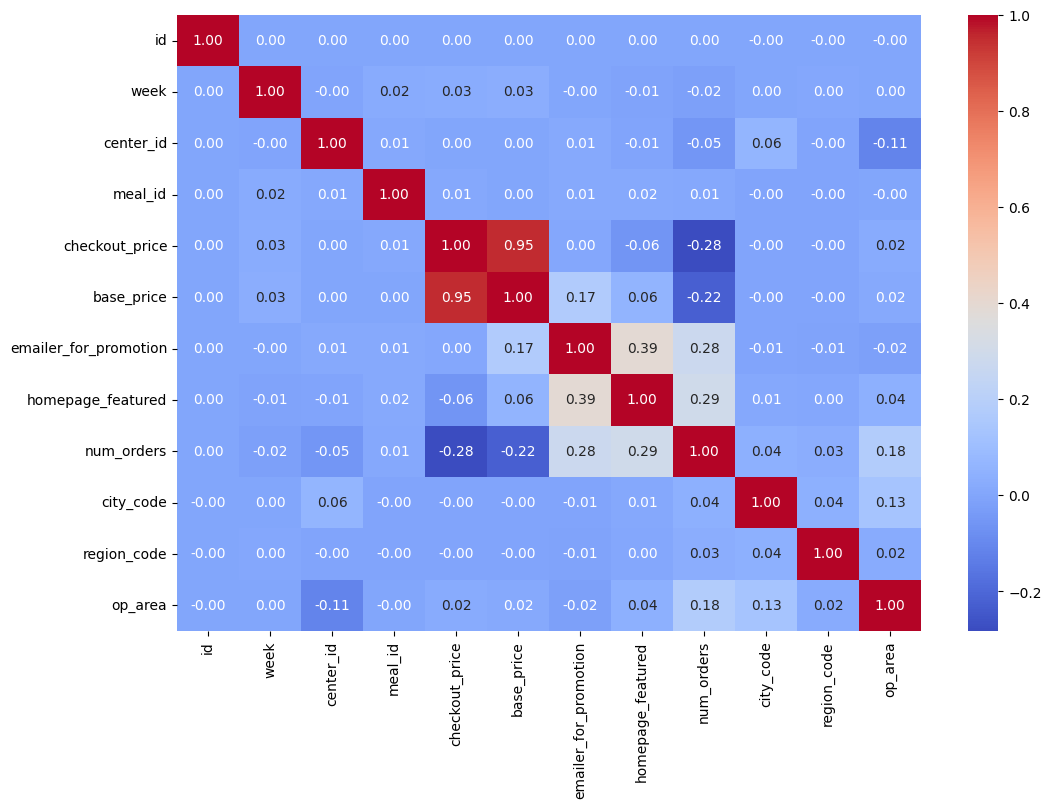

In [12]:
# Correlation matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

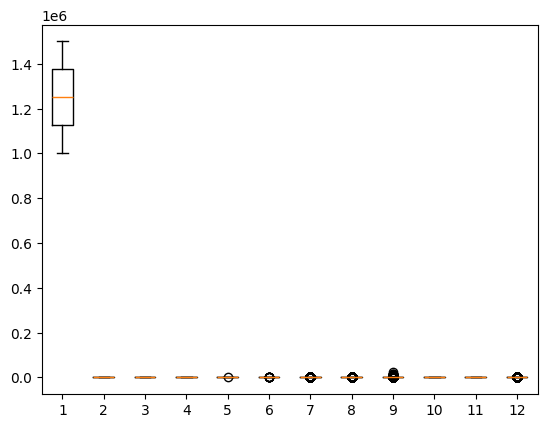

In [13]:
plt.boxplot(numerical_df)
plt.show()

In [14]:
def remove_outliers(df, column_name):     
    q = df[column_name].quantile(0.25)     
    q2 = df[column_name].quantile(0.75)     
    iqr = q2 - q     
    ub = q2 + 1.5*iqr   
    lb = q - 1.5*iqr    
    df[column_name] = df[column_name].clip(upper=ub)    
    df[column_name] = df[column_name].clip(lower=lb)    
    return df[column_name]
    

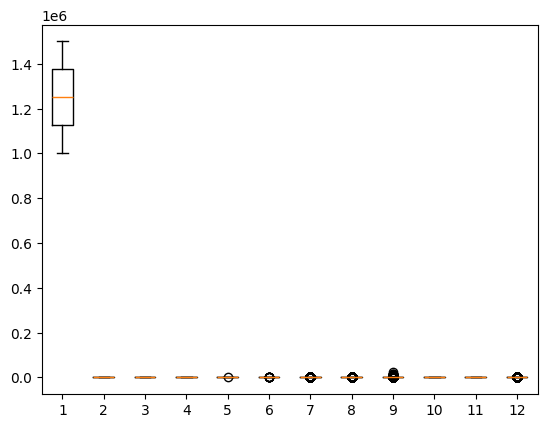

In [15]:
plt.boxplot(numerical_df)
plt.show()

In [16]:
df = pd.get_dummies(df,columns=['category','cuisine','center_type'],dtype = int,drop_first=True)
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,1,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,...,0,0,0,0,0,0,0,1,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,...,0,0,0,0,0,0,0,1,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,...,0,0,0,0,0,1,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,...,0,0,0,0,0,1,0,0,0,0
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,...,0,0,0,0,0,1,0,0,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,...,1,0,0,0,0,0,1,0,0,0
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,...,1,0,0,0,0,0,1,0,0,0


In [17]:
min_scaler = MinMaxScaler()
numerical_colms1 = ['emailer_for_promotion','homepage_featured']
df[numerical_colms1] = min_scaler.fit_transform(df[numerical_colms1])
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0.0,0.0,177,647,...,0,0,0,0,0,0,0,1,0,1
1,1466964,1,55,1993,136.83,135.83,0.0,0.0,270,647,...,0,0,0,0,0,0,0,1,0,1
2,1346989,1,55,2539,134.86,135.86,0.0,0.0,189,647,...,0,0,0,0,0,0,0,1,0,1
3,1338232,1,55,2139,339.50,437.53,0.0,0.0,54,647,...,0,0,0,0,0,1,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0.0,0.0,40,647,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0.0,0.0,68,473,...,0,0,0,0,0,1,0,0,0,0
456544,1062036,145,61,2304,482.09,482.09,0.0,0.0,42,473,...,0,0,0,0,0,1,0,0,0,0
456545,1110849,145,61,2664,237.68,321.07,0.0,0.0,501,473,...,1,0,0,0,0,0,1,0,0,0
456546,1147725,145,61,2569,243.50,313.34,0.0,0.0,729,473,...,1,0,0,0,0,0,1,0,0,0


In [18]:
standard_scaler = StandardScaler()
numerical_column2 = ['week','center_id','meal_id','city_code','region_code','op_area']
df[numerical_column2] = standard_scaler.fit_transform(df[numerical_column2])
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,-1.776494,-0.589577,-0.254535,136.83,152.29,0.0,0.0,177,0.686548,...,0,0,0,0,0,0,0,1,0,1
1,1466964,-1.776494,-0.589577,-0.057246,136.83,135.83,0.0,0.0,270,0.686548,...,0,0,0,0,0,0,0,1,0,1
2,1346989,-1.776494,-0.589577,0.940160,134.86,135.86,0.0,0.0,189,0.686548,...,0,0,0,0,0,0,0,1,0,1
3,1338232,-1.776494,-0.589577,0.209460,339.50,437.53,0.0,0.0,54,0.686548,...,0,0,0,0,0,1,0,0,0,1
4,1448490,-1.776494,-0.589577,1.108221,243.50,242.50,0.0,0.0,40,0.686548,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,1.691304,-0.459071,-0.879283,484.09,484.09,0.0,0.0,68,-1.942016,...,0,0,0,0,0,1,0,0,0,0
456544,1062036,1.691304,-0.459071,0.510874,482.09,482.09,0.0,0.0,42,-1.942016,...,0,0,0,0,0,1,0,0,0,0
456545,1110849,1.691304,-0.459071,1.168503,237.68,321.07,0.0,0.0,501,-1.942016,...,1,0,0,0,0,0,1,0,0,0
456546,1147725,1.691304,-0.459071,0.994962,243.50,313.34,0.0,0.0,729,-1.942016,...,1,0,0,0,0,0,1,0,0,0


In [19]:
X = df.drop('num_orders', axis=1)
y = df['num_orders']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,-1.776494,-0.589577,-0.254535,136.83,152.29,0.0,0.0,0.686548,-0.034837,...,0,0,0,0,0,0,0,1,0,1
1,1466964,-1.776494,-0.589577,-0.057246,136.83,135.83,0.0,0.0,0.686548,-0.034837,...,0,0,0,0,0,0,0,1,0,1
2,1346989,-1.776494,-0.589577,0.940160,134.86,135.86,0.0,0.0,0.686548,-0.034837,...,0,0,0,0,0,0,0,1,0,1
3,1338232,-1.776494,-0.589577,0.209460,339.50,437.53,0.0,0.0,0.686548,-0.034837,...,0,0,0,0,0,1,0,0,0,1
4,1448490,-1.776494,-0.589577,1.108221,243.50,242.50,0.0,0.0,0.686548,-0.034837,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,1.691304,-0.459071,-0.879283,484.09,484.09,0.0,0.0,-1.942016,1.155553,...,0,0,0,0,0,1,0,0,0,0
456544,1062036,1.691304,-0.459071,0.510874,482.09,482.09,0.0,0.0,-1.942016,1.155553,...,0,0,0,0,0,1,0,0,0,0
456545,1110849,1.691304,-0.459071,1.168503,237.68,321.07,0.0,0.0,-1.942016,1.155553,...,1,0,0,0,0,0,1,0,0,0
456546,1147725,1.691304,-0.459071,0.994962,243.50,313.34,0.0,0.0,-1.942016,1.155553,...,1,0,0,0,0,0,1,0,0,0


In [21]:
y

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test)

In [23]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)

        Actual   Predicted
203536      28   -0.620262
301801     176  380.999546
254032     391  225.741202
339158      14  -46.611214
3203       405  647.701880
...        ...         ...
95283      136  160.344363
282522    1608  671.716909
195794     406  539.875068
446517      82  100.959595
302061     405  439.792334

[91310 rows x 2 columns]


In [24]:
from sklearn.model_selection import GridSearchCV
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 88997.89628313266
R2 Score: 0.4165353033179302


In [25]:
df3 = pd.read_csv("test_QoiMO9B.csv")

In [26]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
203536,28,-0.620262
301801,176,380.999546
254032,391,225.741202
339158,14,-46.611214
3203,405,647.701880
...,...,...
95283,136,160.344363
282522,1608,671.716909
195794,406,539.875068
446517,82,100.959595


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

C:\Users\Bacardi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
